# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [1]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [2]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [4]:
print("1. Dimensiones del DataFrame:")
print(df_airbnb.shape)  # (número de registros, número de columnas)

# Nombre de las columnas
print("\n2. Columnas disponibles:")
print(df_airbnb.columns.tolist())

# Tipos de datos y valores no nulos
print("\n3. Información general (tipos de datos y nulos):")
print(df_airbnb.info())

1. Dimensiones del DataFrame:
(13232, 9)

2. Columnas disponibles:
['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price']

3. Información general (tipos de datos y nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               13232 non-null  int64  
 1   host_id               13232 non-null  int64  
 2   room_type             13232 non-null  object 
 3   neighborhood          13232 non-null  object 
 4   reviews               13232 non-null  int64  
 5   overall_satisfaction  13222 non-null  float64
 6   accommodates          13232 non-null  int64  
 7   bedrooms              13232 non-null  float64
 8   price                 13232 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 930.5+ KB
None


In [5]:
# Estadísticas básicas de variables numéricas
print("\n4. Estadísticas descriptivas (numéricas):")
print(df_airbnb.describe())

# Estadísticas de variables categóricas (object)
print("\n5. Estadísticas descriptivas (categóricas):")
print(df_airbnb.describe(include=['object']))


4. Estadísticas descriptivas (numéricas):
            room_id       host_id       reviews  overall_satisfaction  \
count  1.323200e+04  1.323200e+04  13232.000000          13222.000000   
mean   1.055081e+07  3.616444e+07     29.130063              3.284677   
std    6.069884e+06  3.706975e+07     42.802762              2.123236   
min    6.499000e+03  1.445500e+04      0.000000              0.000000   
25%    5.054848e+06  6.197930e+06      2.000000              0.000000   
50%    1.166226e+07  2.207571e+07     11.000000              4.500000   
75%    1.609631e+07  5.546697e+07     39.000000              5.000000   
max    1.940072e+07  1.359156e+08    438.000000              5.000000   

       accommodates      bedrooms         price  
count  13232.000000  13232.000000  13232.000000  
mean       3.917775      1.549501     86.592352  
std        2.293757      1.062821    135.208926  
min        1.000000      0.000000     10.000000  
25%        2.000000      1.000000     45.000000  

In [6]:
# Conteo de tipos de alojamiento
print("\n7. Distribución de tipos de alojamiento:")
print(df_airbnb['room_type'].value_counts())

# Conteo de barrios
print("\n8. Distribución por barrios:")
print(df_airbnb['neighborhood'].value_counts())


7. Distribución de tipos de alojamiento:
room_type
Entire home/apt    9764
Private room       3297
Shared room         171
Name: count, dtype: int64

8. Distribución por barrios:
neighborhood
Santa Maria Maior          2798
Misericórdia               2402
Arroios                    1664
Santo António              1105
São Vicente                1041
Estrela                     803
Avenidas Novas              566
Penha de França             407
Campo de Ourique            319
Areeiro                     280
Belém                       254
Alvalade                    253
Parque das Nações           250
Alcântara                   213
São Domingos de Benfica     138
Lumiar                      124
Campolide                   123
Ajuda                       108
Olivais                     108
Beato                        84
Benfica                      71
Marvila                      51
Carnide                      47
Santa Clara                  23
Name: count, dtype: int64


### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso. 


Nota: 
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

#### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [7]:
# Filtrar según los criterios de Alicia
filtro_alicia = df_airbnb[
    (df_airbnb['room_type'] == 'Entire home/apt') &  # Casa/apartamento completo
    (df_airbnb['accommodates'] >= 4) &               # Capacidad para 4 personas
    (df_airbnb['bedrooms'] >= 2) &                   # Mínimo 2 habitaciones
    (df_airbnb['reviews'] > 10) &                    # Más de 10 reseñas
    (df_airbnb['overall_satisfaction'] > 4)          # Puntuación > 4
]

# Ordenar por puntuación (descendente) y reseñas (descendente)
resultados_alicia = filtro_alicia.sort_values(
    by=['overall_satisfaction', 'reviews'],
    ascending=[False, False]
)

# Mostrar las 3 mejores opciones (sin importar el precio)
top_3_alicia = resultados_alicia.head(3)

# Seleccionar columnas relevantes para mostrar
columnas_relevantes = ['room_id', 'neighborhood', 'room_type', 'accommodates', 'bedrooms', 'price', 'reviews', 'overall_satisfaction']
top_3_alicia[columnas_relevantes]

,room_id,neighborhood,room_type,accommodates,bedrooms,price,reviews,overall_satisfaction
120,176153,Misericórdia,Entire home/apt,4,2.0,102.0,438,5.0
16,44043,Santa Maria Maior,Entire home/apt,7,3.0,80.0,316,5.0
140,202150,Santa Maria Maior,Entire home/apt,4,2.0,62.0,274,5.0


#### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [11]:
# Filtrar las propiedades de Roberto y Clara
ids_buscados = [97503, 90387]
filtro_roberto_clara = df_airbnb[df_airbnb['room_id'].isin(ids_buscados)]

# Seleccionar columnas relevantes
columnas_relevantes = ['room_id', 'host_id', 'neighborhood', 'room_type', 'reviews', 'overall_satisfaction']
resultados_roberto_clara = filtro_roberto_clara[columnas_relevantes]

# Guardar el DataFrame
resultados_roberto_clara.to_excel("roberto.xlsx", index=False)

print("Archivo 'roberto.xlsx' creado exitosamente!")
display(resultados_roberto_clara)

Archivo 'roberto.xlsx' creado exitosamente!


,room_id,host_id,neighborhood,room_type,reviews,overall_satisfaction
41,90387,490050,Santo António,Private room,204,5.0
48,97503,515924,Santo António,Private room,39,4.0



#### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [12]:
# Filtrar por presupuesto (≤50€)
filtro_diana = df_airbnb[df_airbnb["price"] <= 50]

# Ordenar:
# 1. Priorizar Shared rooms con mejor puntuación
# 2. Luego, otras propiedades por precio (más baratas primero)
resultados_diana = filtro_diana.sort_values(
    by=[
        "room_type",  # Shared room aparece primero (orden alfabético)
        "overall_satisfaction", 
        "price"
    ],
    ascending=[
        True,   # room_type (Shared room primero)
        False,  # overall_satisfaction (mejor puntuación primero)
        True    # price (más barato primero)
    ]
)

# Seleccionar las 10 mejores opciones
top_10_diana = resultados_diana.head(10)

# Mostrar columnas relevantes
columnas_relevantes = [
    "room_id", "neighborhood", "room_type", 
    "price", "overall_satisfaction", "reviews"
]

top_10_diana[columnas_relevantes]

,room_id,neighborhood,room_type,price,overall_satisfaction,reviews
6133,10630926,Estrela,Entire home/apt,18.0,5.0,51
9479,15490427,Santo António,Entire home/apt,23.0,5.0,19
9552,15565916,Alcântara,Entire home/apt,23.0,5.0,26
9862,15994151,São Vicente,Entire home/apt,26.0,5.0,21
10958,17379690,Santa Maria Maior,Entire home/apt,26.0,5.0,15
6144,10669972,Estrela,Entire home/apt,29.0,5.0,35
7593,13125854,Arroios,Entire home/apt,29.0,5.0,12
10123,16320810,São Vicente,Entire home/apt,29.0,5.0,5
10229,16440273,Misericórdia,Entire home/apt,29.0,5.0,16
9733,15805475,Ajuda,Entire home/apt,30.0,5.0,31


### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados. 
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc


Precio promedio por barrio y tipo de habitación:


room_type,Entire home/apt,Private room,Shared room
neighborhood,,,
Ajuda,73.060241,31.916667,21.000000
Alcântara,81.018072,42.787234,NaN
Alvalade,97.984000,43.435484,25.250000
Areeiro,162.245902,41.696552,32.538462
Arroios,100.772629,37.150997,57.088235
Avenidas Novas,129.487903,45.317568,27.090909
Beato,55.113208,30.000000,NaN
Belém,85.492611,61.640000,16.000000
Benfica,362.224490,67.227273,NaN


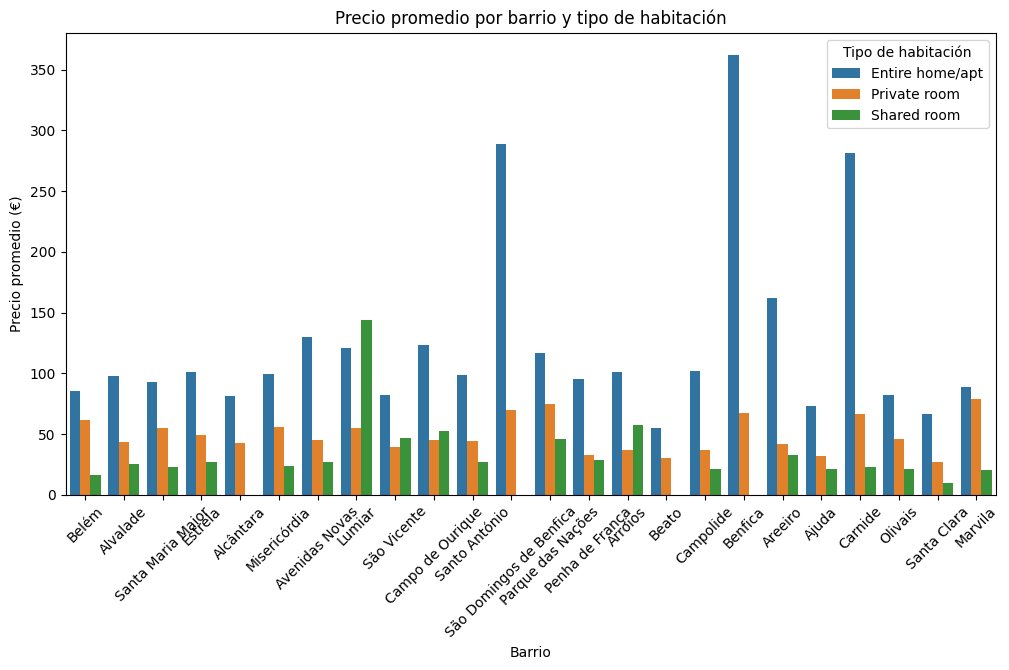

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupamiento 1: Precio promedio por tipo de habitación y barrio
agrupamiento1 = df_airbnb.groupby(['neighborhood', 'room_type'])['price'].mean().unstack()
print("Precio promedio por barrio y tipo de habitación:")
display(agrupamiento1)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_airbnb, x='neighborhood', y='price', hue='room_type', 
            estimator='mean', errorbar=None)
plt.title('Precio promedio por barrio y tipo de habitación')
plt.xlabel('Barrio')
plt.ylabel('Precio promedio (€)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de habitación')
plt.show()


Satisfacción promedio por número de habitaciones:


bedrooms
0.0     3.401299
1.0     3.167956
2.0     3.464275
3.0     3.490361
4.0     3.334783
5.0     3.071970
6.0     3.042254
7.0     2.800000
8.0     2.000000
9.0     2.722222
10.0    2.428571
Name: overall_satisfaction, dtype: float64

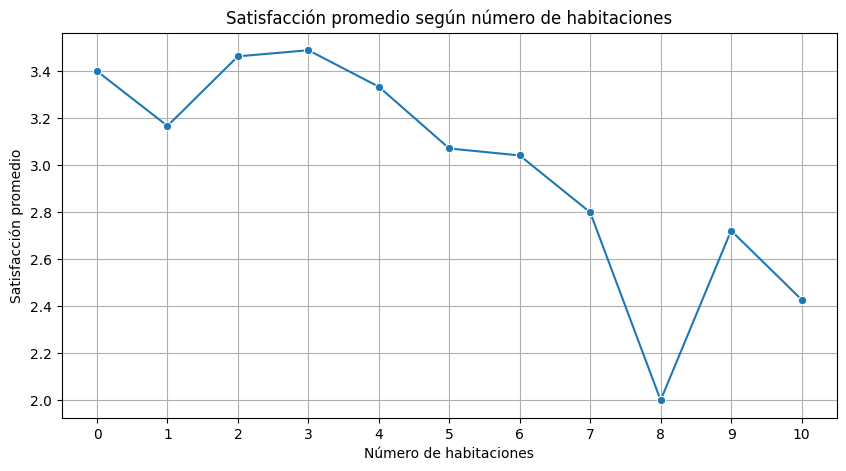

In [14]:
# Agrupamiento 2: Satisfacción promedio por número de habitaciones
agrupamiento2 = df_airbnb.groupby('bedrooms')['overall_satisfaction'].mean()
print("\nSatisfacción promedio por número de habitaciones:")
display(agrupamiento2)

# Gráfico de línea
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_airbnb, x='bedrooms', y='overall_satisfaction', 
             estimator='mean', errorbar=None, marker='o')
plt.title('Satisfacción promedio según número de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Satisfacción promedio')
plt.xticks(range(0, int(df_airbnb['bedrooms'].max())+1))
plt.grid(True)
plt.show()

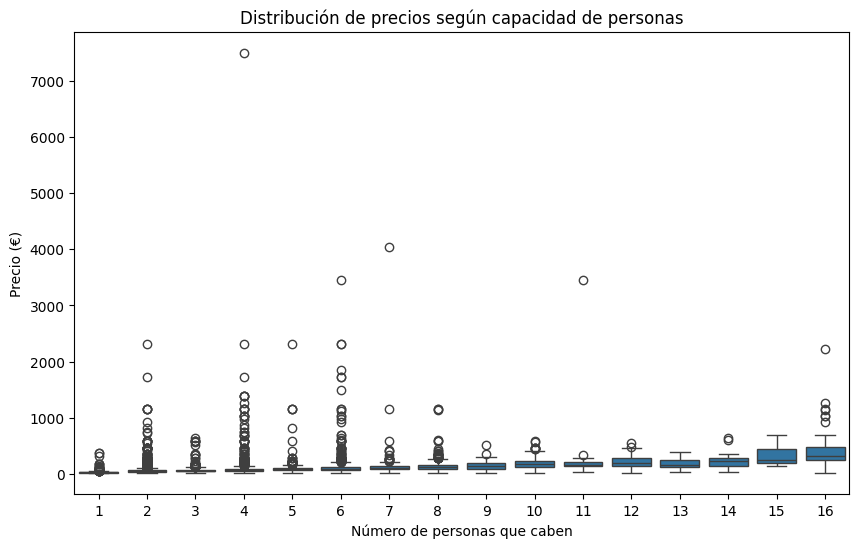

In [15]:
# Agrupamiento 3: Distribución de precios por capacidad de personas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_airbnb, x='accommodates', y='price')
plt.title('Distribución de precios según capacidad de personas')
plt.xlabel('Número de personas que caben')
plt.ylabel('Precio (€)')
plt.show()

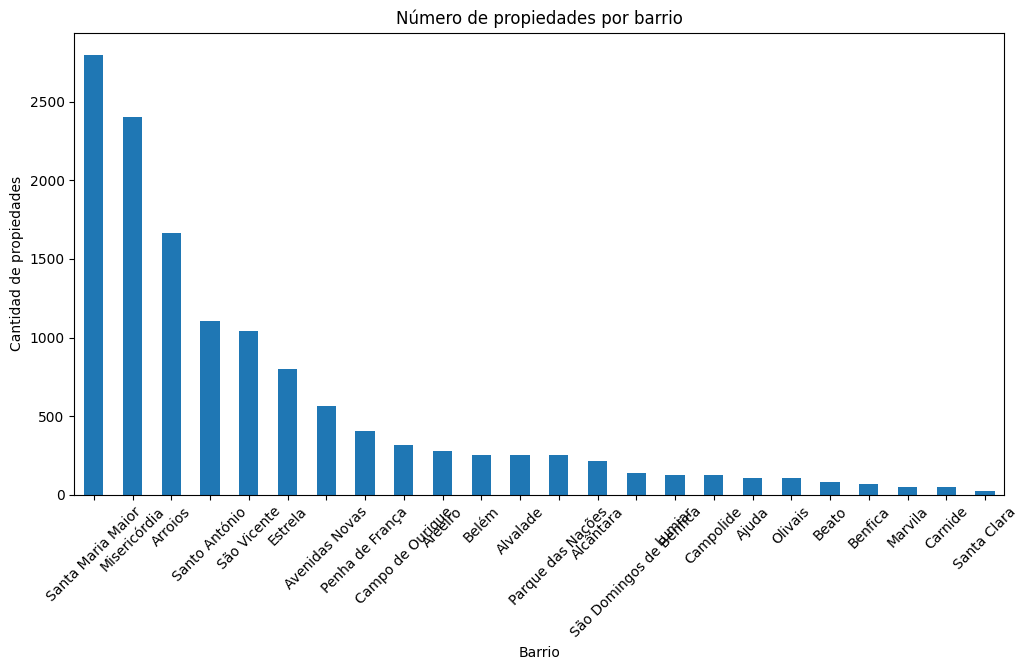

In [16]:
# Agrupamiento 4: Conteo de propiedades por barrio
plt.figure(figsize=(12, 6))
df_airbnb['neighborhood'].value_counts().plot(kind='bar')
plt.title('Número de propiedades por barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de propiedades')
plt.xticks(rotation=45)
plt.show()